In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates

circuits = pd.read_csv("data_raw/circuits.csv")

circuits["country"] = circuits["country"].replace(["United States"],["USA"])

drivers = pd.read_csv("data_raw/drivers.csv")

drivers["nationality"] = drivers["nationality"].replace(["East German"],["German"])
drivers["nationality"] = drivers["nationality"].replace(["American-Italian"],["Italian"])
drivers["nationality"] = drivers["nationality"].replace(["Argentine-Italian"],["Italian"])

circuits["country"] = circuits["country"].replace(["UK"],["British"])
circuits["country"] = circuits["country"].replace(["Spain"],["Spanish"])
circuits["country"] = circuits["country"].replace(["Japan"],["Japanese"])
circuits["country"] = circuits["country"].replace(["France"],["French"])
circuits["country"] = circuits["country"].replace(["Brazil"],["Brazilian"])
circuits["country"] = circuits["country"].replace(["Italy"],["Italian"])
circuits["country"] = circuits["country"].replace(["Australia"],["Australian"])
circuits["country"] = circuits["country"].replace(["Austria"],["Austrian"])
circuits["country"] = circuits["country"].replace(["USA"],["American"])
circuits["country"] = circuits["country"].replace(["Netherlands"],["Dutch"])
circuits["country"] = circuits["country"].replace(["Portugal"],["Portuguese"])
circuits["country"] = circuits["country"].replace(["Canada"],["Canadian"])
circuits["country"] = circuits["country"].replace(["India"],["Indian"])
circuits["country"] = circuits["country"].replace(["Hungary"],["Hungarian"])
circuits["country"] = circuits["country"].replace(["Argentina"],["Argentine"])
circuits["country"] = circuits["country"].replace(["Malaysia"],["Malaysian"])
circuits["country"] = circuits["country"].replace(["Switzerland"],["Swiss"])
circuits["country"] = circuits["country"].replace(["Belgium"],["Belgian"])
circuits["country"] = circuits["country"].replace(["Monaco"],["Monegasque"])
circuits["country"] = circuits["country"].replace(["Sweden"],["Swedish"])
circuits["country"] = circuits["country"].replace(["Mexico"],["Mexican"])
circuits["country"] = circuits["country"].replace(["South Africa"],["South African"])
circuits["country"] = circuits["country"].replace(["Russia"],["Russian"])
circuits["country"] = circuits["country"].replace(["China"],["Chinese"])

results = pd.read_csv("data_raw/results.csv")

races = pd.read_csv("data_raw/races.csv")

races_merge = pd.merge(races,
                         circuits[["circuitId", "country"]],
                         on = "circuitId",
                         how = "left")

results_merge1 = pd.merge(results,
                         races_merge[["raceId", "country", "year"]],
                         on = "raceId",
                         how = "left")

results_merge_final = pd.merge(results_merge1,
                         drivers[["driverId", "nationality", "forename", "surname"]],
                         on = "driverId",
                         how = "left")

results_merge_final = results_merge_final[["raceId","nationality","year", "country", "milliseconds", "driverId", "forename", "surname"]]


In [2]:

subset      = results_merge_final.query("milliseconds.str.isnumeric() == False")
list_unique = pd.unique(subset["milliseconds"])
print(list_unique)
list_old = ['\\N']
list_new = [np.nan]
results_merge_final["milliseconds"] = results_merge_final["milliseconds"].replace(list_old, list_new)

['\\N']


In [3]:
results_merge_final = results_merge_final.dropna()

In [8]:
results_merge_final['win_status'] = results_merge_final.groupby('raceId')['milliseconds'].apply(lambda x: (x == x.min()).astype(int))

In [18]:
results_merge_final['local_status'] = np.where(results_merge_final["nationality"] == results_merge_final["country"],1,0)

In [22]:
from sklearn.metrics import confusion_matrix



tn, fp, fn, tp = confusion_matrix(results_merge_final['win_status'], results_merge_final['local_status']).ravel()

print("            Not Hometown Racer        Hometown Racer")
print("Loser            {}                       {}".format(tn,fp))
print("Winner           {}                       {}".format(fn,tp))

            Not Hometown Racer        Hometown Racer
Loser            5614                       391
Winner           1005                       77


In [25]:
hometown_winner = results_merge_final.query("win_status == local_status & win_status == 1")

fig, ax = plt.subplots(1,1)
ax.hist(x = hometown_winner["nationality"])
ax.legend(["","Dow Jones"])
ax.set_ylabel("Frequency")
ax.set_xlabel("Daily percentage growth")
ax.set_title("Histogram of portfolio growth")


list_unique_countries = pd.unique(results_merge_final["country"])


plt.hist(winner["win_status"], alpha=0.5)

plt.legend(labels = list_unique_countries)

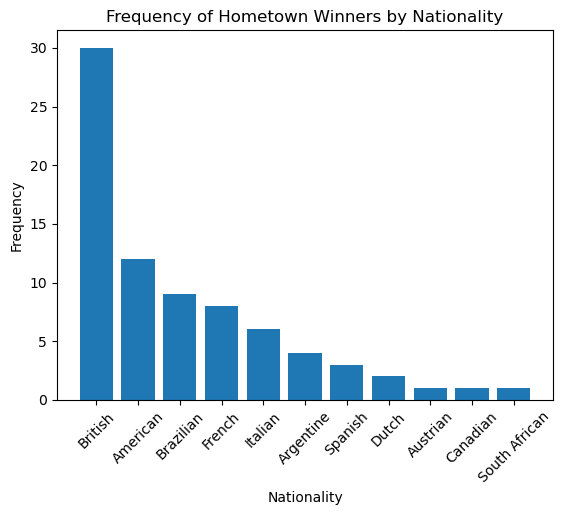

In [36]:
value_counts = hometown_winner["nationality"].value_counts()
fig, ax = plt.subplots(1,1)
ax.bar(value_counts.index, value_counts.values)
ax.set_ylabel("Frequency")
ax.set_xlabel("Nationality")
ax.set_title("Frequency of Hometown Winners by Nationality")
ax.xaxis.set_tick_params(rotation = 45)

In [35]:
display(hometown_winner)

,raceId,nationality,year,country,milliseconds,driverId,forename,surname,win_status,local_status
168,26,British,2008,British,5949440,1,Lewis,Hamilton,1,1
348,35,Brazilian,2008,Brazilian,5651435,13,Felipe,Massa,1,1
852,58,Spanish,2006,Spanish,5181759,4,Fernando,Alonso,1,1
1116,70,Brazilian,2006,Brazilian,5513751,13,Felipe,Massa,1,1
2996,161,British,2000,British,5330108,14,David,Coulthard,1,1
...,...,...,...,...,...,...,...,...,...,...
24380,1019,British,2019,British,4868452,1,Lewis,Hamilton,1,1
24680,1034,British,2020,British,5281283,1,Lewis,Hamilton,1,1
25140,1061,British,2021,British,7103284,1,Lewis,Hamilton,1,1
25200,1064,Dutch,2021,Dutch,5405395,830,Max,Verstappen,1,1


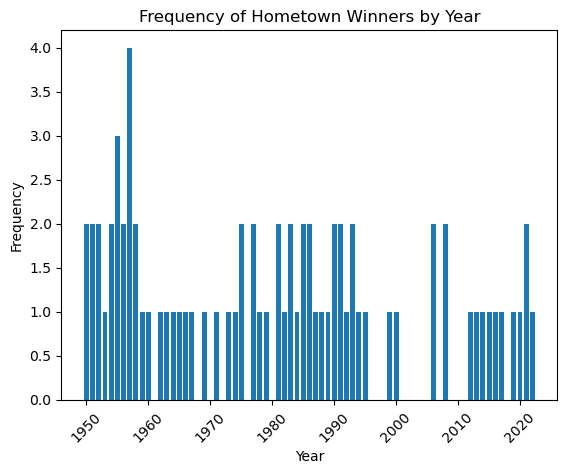

In [50]:

value_counts = hometown_winner["year"].value_counts()
fig, ax = plt.subplots(1,1)
ax.bar(value_counts.index, value_counts.values)
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_title("Frequency of Hometown Winners by Year")
ax.xaxis.set_tick_params(rotation = 45)



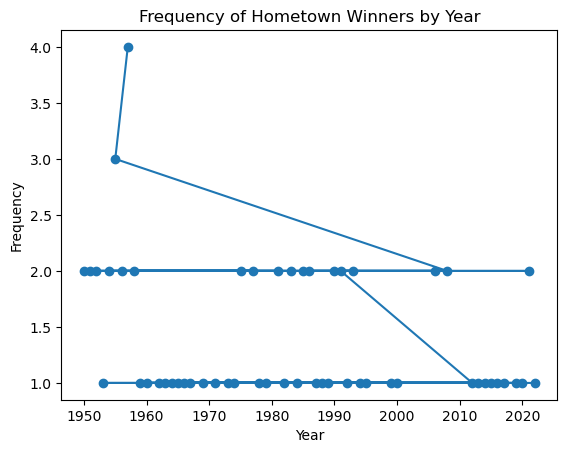

In [75]:
values = hometown_winner.sort_values("year")
values_counts = values["year"].value_counts()
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.title("Frequency of Hometown Winners by Year")

plt.scatter(value_counts.index, value_counts.values)
plt.plot(value_counts.index, value_counts.values)
